## CustomerSegmentation

### import libraries

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



pd.pandas.set_option('display.max_columns', None)

### load data

In [173]:
train = pd.read_csv('Train_aBjfeNk.csv')
test = pd.read_csv('Test_LqhgPWU.csv')
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [174]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
ID                 8068 non-null int64
Gender             8068 non-null object
Ever_Married       7928 non-null object
Age                8068 non-null int64
Graduated          7990 non-null object
Profession         7944 non-null object
Work_Experience    7239 non-null float64
Spending_Score     8068 non-null object
Family_Size        7733 non-null float64
Var_1              7992 non-null object
Segmentation       8068 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 693.4+ KB


In [176]:
print(train.shape)
print(test.shape)

(8068, 11)
(2627, 10)


### handle missing value

In [177]:
train1 = train.copy()
test1 = test.copy()

In [178]:
train1.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [179]:
train1['Ever_Married'] = train1['Ever_Married'].fillna(train.Ever_Married.mode()[0])
train1['Graduated'] = train1['Graduated'].fillna(train.Graduated.mode()[0])
train1['Profession'] = train1['Profession'].fillna(train.Profession.mode()[0])
train1['Work_Experience'] = train1['Work_Experience'].fillna(train.Work_Experience.mean())
train1['Family_Size'] = train1['Family_Size'].fillna(train.Family_Size.median())
train1['Var_1'] = train1['Var_1'].fillna(train.Var_1.mode()[0])

In [180]:
train1.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [181]:
test1.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [182]:
test1['Ever_Married'] = test1['Ever_Married'].fillna(test1.Ever_Married.mode()[0])
test1['Graduated'] = test1['Graduated'].fillna(test1.Graduated.mode()[0])
test1['Profession'] = test1['Profession'].fillna(test1.Profession.mode()[0])
test1['Work_Experience'] = test1['Work_Experience'].fillna(test1.Work_Experience.mean())
test1['Family_Size'] = test1['Family_Size'].fillna(test1.Family_Size.median())
test1['Var_1'] = test1['Var_1'].fillna(test1.Var_1.mode()[0])

In [183]:
test1.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

### EDA

In [184]:
train2 = train1.copy()

In [185]:
train2 = train2.drop('ID',axis=1)
train2.shape

(8068, 10)

In [186]:
train2.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,8068.000000
mean,43.466906,2.641663,2.856346
std,16.711696,3.226972,1.499577
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [187]:
#printing the unique value
for feature in train2.columns:
    print('{} = {}'.format(feature, len(train2[feature].unique())))

Gender = 2
Ever_Married = 2
Age = 67
Graduated = 2
Profession = 9
Work_Experience = 16
Spending_Score = 3
Family_Size = 9
Var_1 = 7
Segmentation = 4


In [188]:
categorical_feature = [f for f in train2.columns if train2[f].dtypes == 'object']
numerical_feature = [f for f in train2.columns if f not in categorical_feature]

#### analyze numerical feature

In [189]:
numerical_feature

['Age', 'Work_Experience', 'Family_Size']

In [190]:
train2.Age.value_counts()

35    250
37    234
33    232
42    232
27    229
40    229
43    226
32    221
38    221
28    220
25    218
31    214
36    209
39    208
41    206
26    200
30    196
29    183
50    180
47    167
51    161
46    160
45    158
53    158
52    157
49    155
48    154
22    142
19    134
18    132
     ... 
61     93
57     93
62     85
63     80
58     80
65     72
66     72
70     71
68     69
69     67
72     67
67     55
73     54
71     49
81     42
82     36
89     36
83     35
88     35
79     34
84     33
75     32
86     30
74     30
77     30
78     29
87     28
76     27
80     24
85     22
Name: Age, Length: 67, dtype: int64

In [191]:
train2.Work_Experience.value_counts()

1.000000     2354
0.000000     2318
2.641663      829
9.000000      474
8.000000      463
2.000000      286
3.000000      255
4.000000      253
6.000000      204
7.000000      196
5.000000      194
10.000000      53
11.000000      50
12.000000      48
13.000000      46
14.000000      45
Name: Work_Experience, dtype: int64

In [192]:
train2.Family_Size.value_counts()

2.0    2390
3.0    1832
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

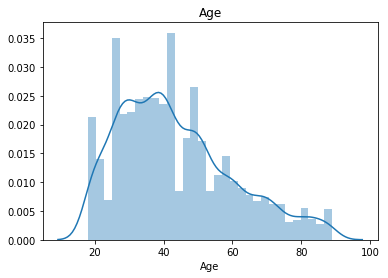

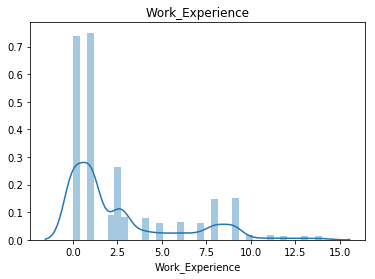

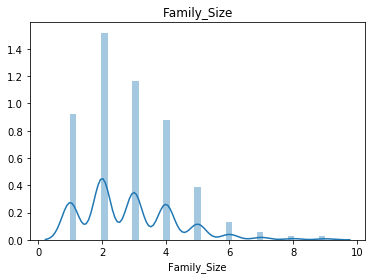

In [193]:
#visualize histogram plot
for feature in numerical_feature:
    sns.distplot(train2[feature], hist=True)
    plt.title(feature)
    plt.show()

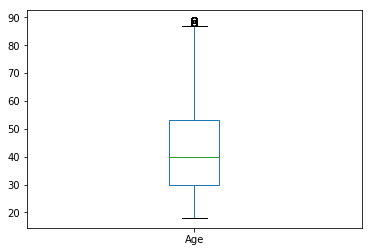

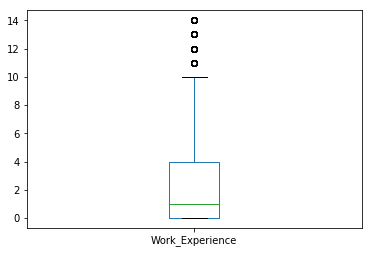

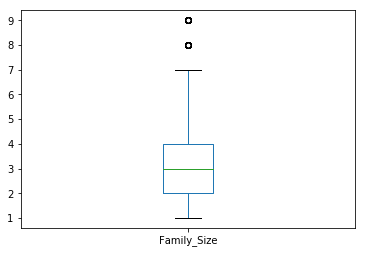

In [194]:
#visualize using boxplot
for feature in numerical_feature:
    train2[feature].plot(kind='box')
    plt.show()

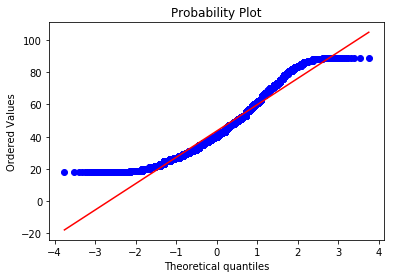

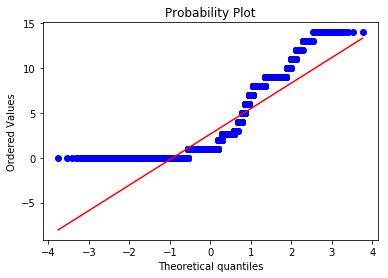

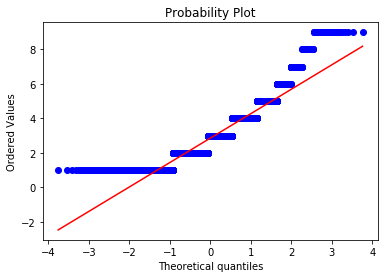

In [195]:
#probability plot
for feature in numerical_feature:
    stats.probplot(train2[feature], dist='norm', plot = plt)
    plt.show()

#### correlation among numerical_feature

In [196]:
train2_corr = train2.corr().abs().unstack().sort_values(
    kind='quicksort', ascending=False).reset_index()
#rename column
train2_corr.rename(columns=
        {'level_0':'Feature1', 'level_1' : 'Feature2', 0:'Correlation_coefficient'},inplace=True)

In [197]:
train2_corre = train2_corr.drop(train2_corr[train2_corr.Correlation_coefficient == 1.0].index)

In [198]:
train2_corre

,Feature1,Feature2,Correlation_coefficient
3,Family_Size,Age,0.273373
4,Age,Family_Size,0.273373
5,Work_Experience,Age,0.179361
6,Age,Work_Experience,0.179361
7,Family_Size,Work_Experience,0.058461
8,Work_Experience,Family_Size,0.058461


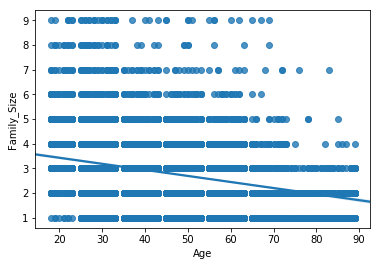

In [199]:
#regplot
sns.regplot(x='Age', y='Family_Size', data=train2)

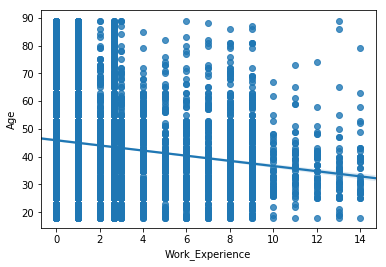

In [200]:
sns.regplot(x='Work_Experience', y='Age', data=train2)

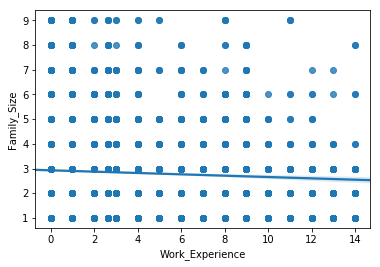

In [201]:
sns.regplot(x='Work_Experience', y='Family_Size', data=train2)

In [202]:
#now we want to explore more in terms of statics
slope, intercept, r_value, p_value, std_err = stats.linregress(train2['Work_Experience'],
                                                              train2['Family_Size'])
print('slope = ',slope)
print('intercept = ', intercept)
print('p_value = ', p_value)
print('std_err = ', std_err)
print('r_value = ',r_value)

slope =  -0.027167049939896448
intercept =  2.928112254938787
p_value =  1.4818474322385307e-07
std_err =  0.005165364185717017
r_value =  -0.05846137195480073


In [203]:
#now we want to explore more in terms of statics
slope, intercept, r_value, p_value, std_err = stats.linregress(train2['Work_Experience'],
                                                              train2['Age'])
print('slope = ',slope)
print('intercept = ', intercept)
print('p_value = ', p_value)
print('std_err = ', std_err)
print('r_value = ',r_value)

slope =  -0.9288679440847718
intercept =  45.92066257424385
p_value =  2.6310240638050788e-59
std_err =  0.0567277662218663
r_value =  -0.1793612496432349


In [204]:
#now we want to explore more in terms of statics
slope, intercept, r_value, p_value, std_err = stats.linregress(train2['Family_Size'],
                                                              train2['Age'])
print('slope = ',slope)
print('intercept = ', intercept)
print('p_value = ', p_value)
print('std_err = ', std_err)
print('r_value = ',r_value)

slope =  -3.0465444789523892
intercept =  52.16889161098882
p_value =  2.9285299430573506e-138
std_err =  0.11935932366734095
r_value =  -0.27337301773920636


#### categorical_feature

In [205]:
categorical_feature

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1',
 'Segmentation']

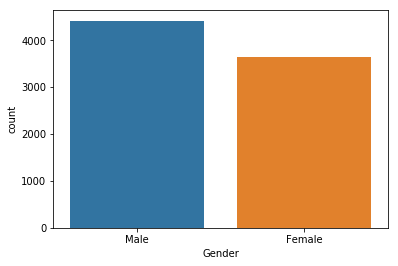

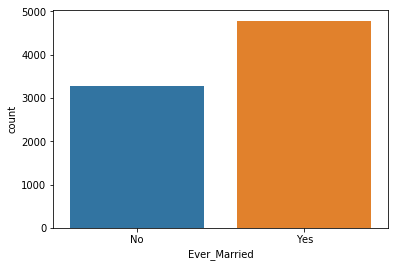

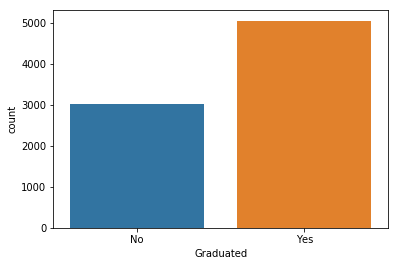

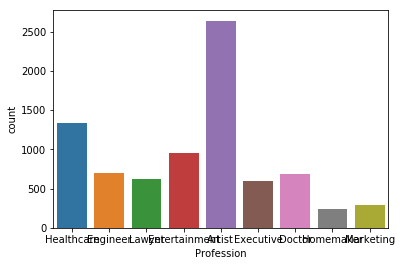

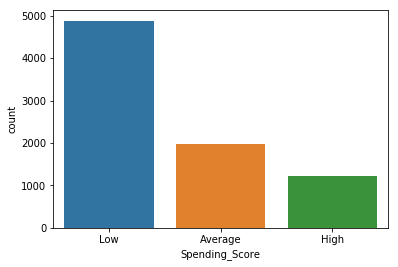

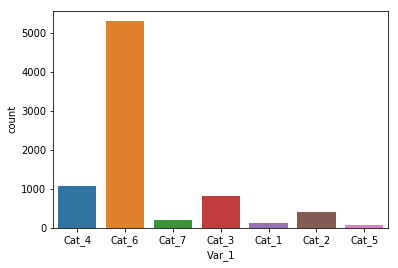

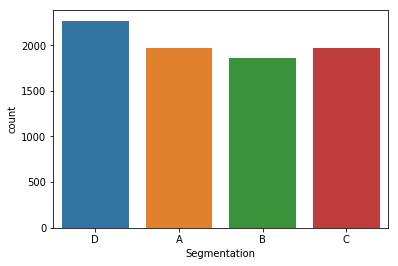

In [206]:
#count plot
for feature in categorical_feature:
    sns.countplot(x=train2[feature])
    plt.show()

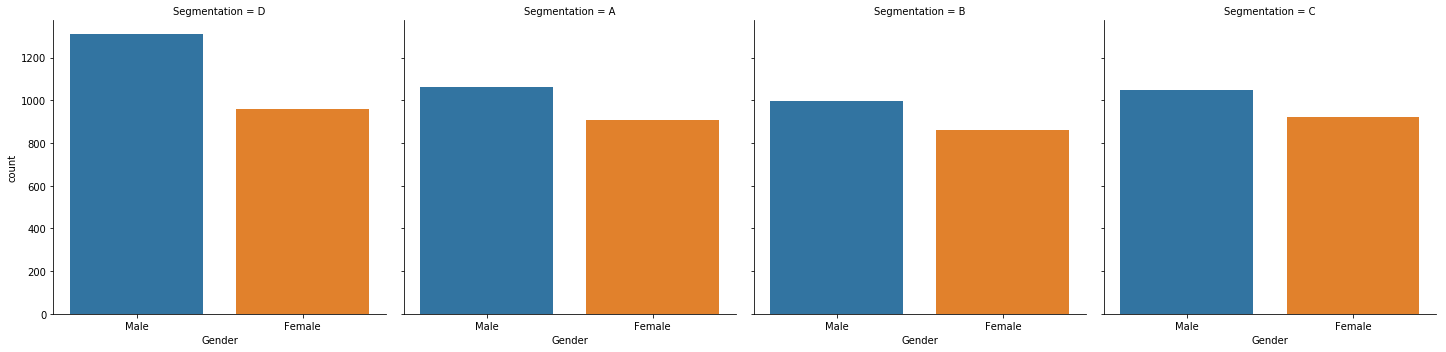

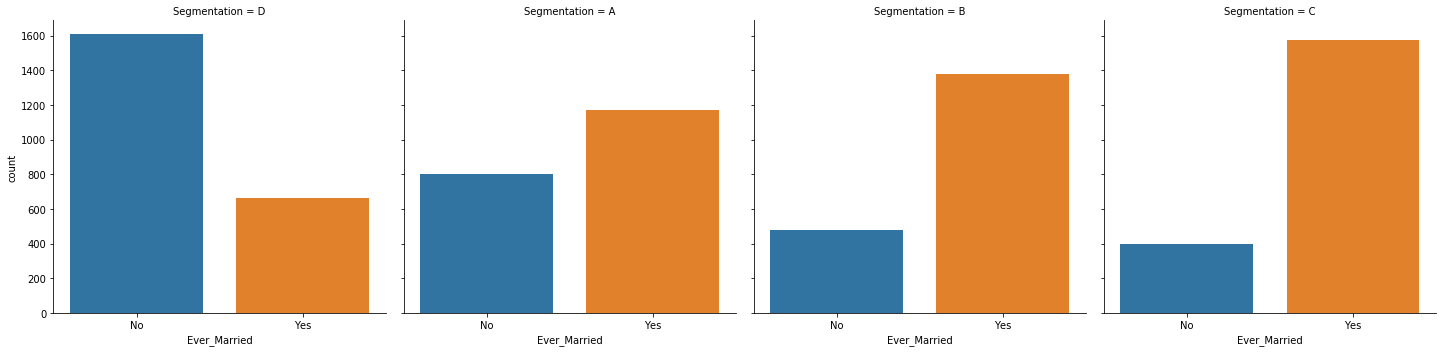

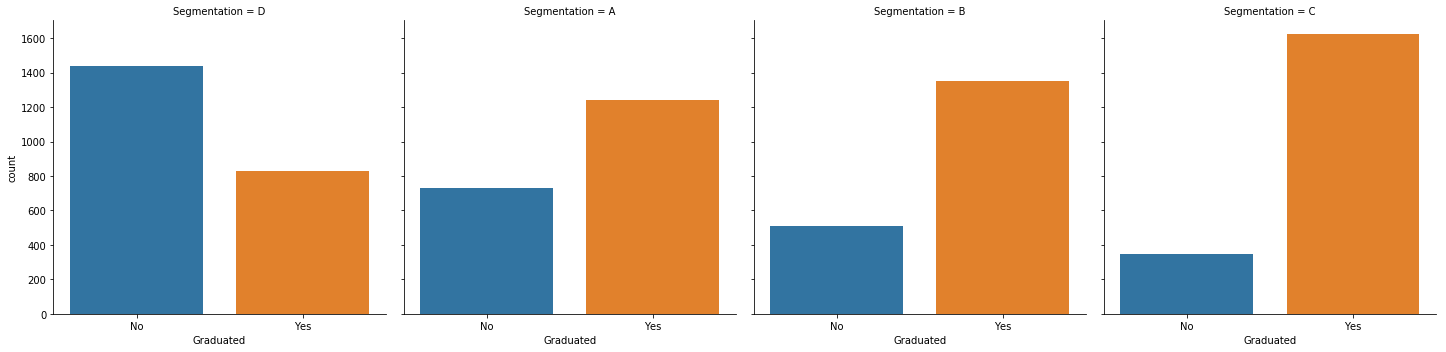

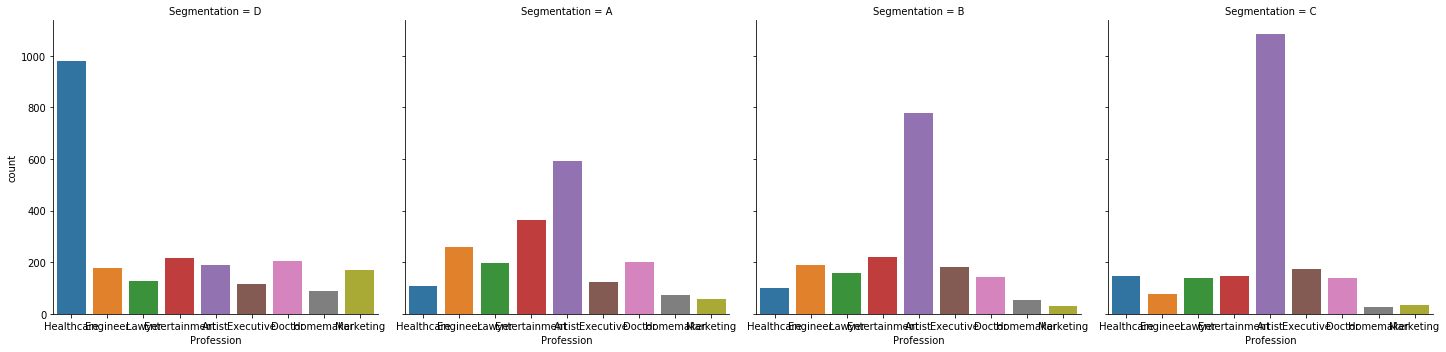

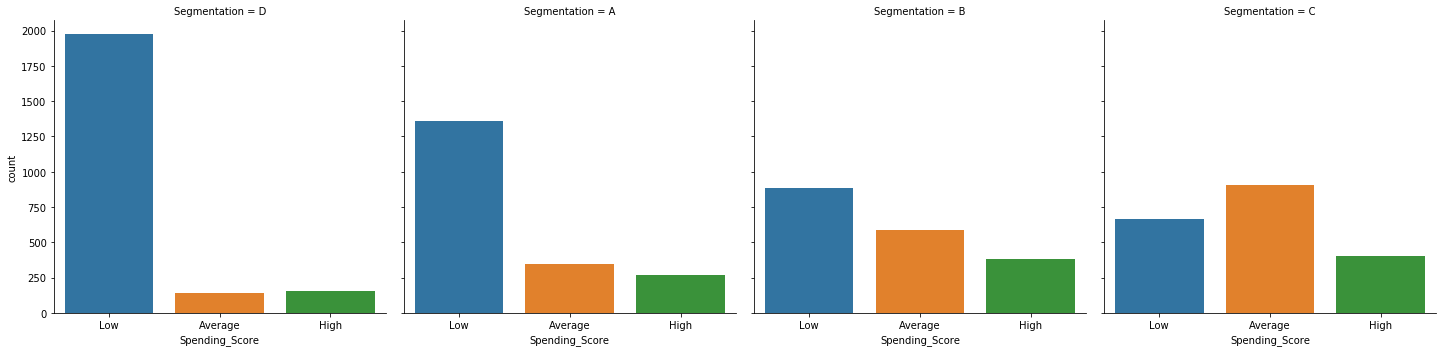

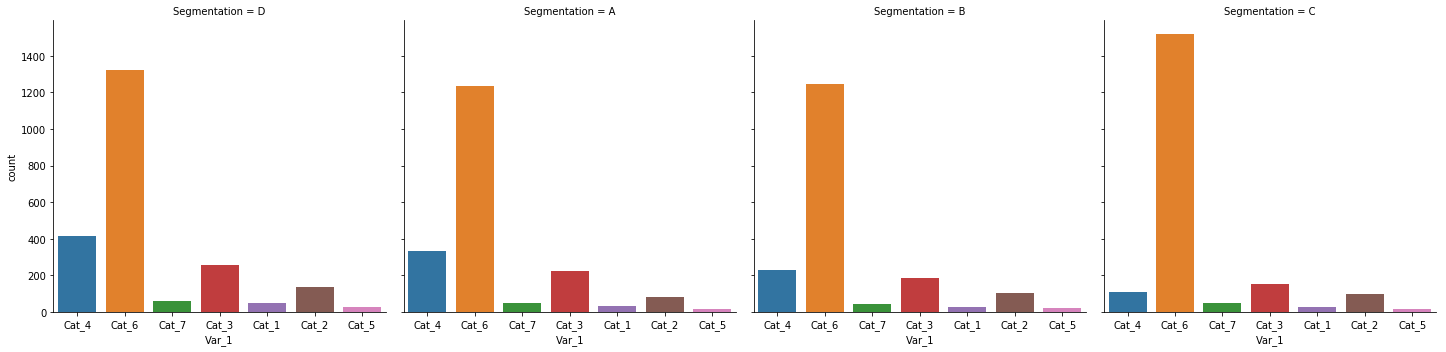

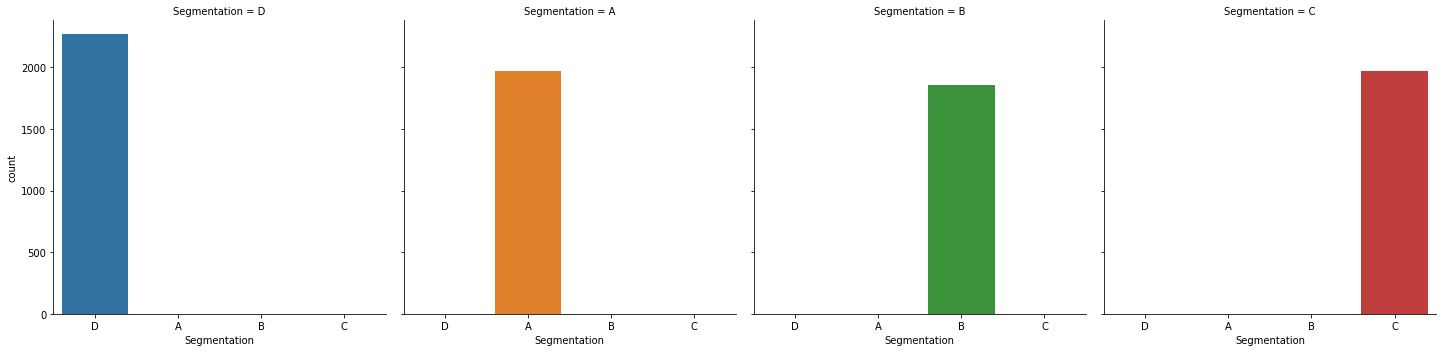

In [207]:
for feature in categorical_feature:
    sns.catplot(x=feature, col='Segmentation', kind='count',data=train2)
    plt.show()

### Data Segmentation

In [208]:
train3 = train2.copy()

In [209]:
train3['Work_Experience'] = pd.cut(train3['Work_Experience'],3, labels=['good','bad','better'])
train3['Work_Experience'].value_counts()

good      6295
bad       1531
better     242
Name: Work_Experience, dtype: int64

In [210]:
train3.Work_Experience.head()

0    good
1    good
2    good
3    good
4    good
Name: Work_Experience, dtype: category
Categories (3, object): [good < bad < better]

In [211]:
train3['Family_Size'] = pd.cut(train3['Family_Size'],4, labels=['v_small','small','mediam','big'])
train3['Family_Size'].value_counts()

v_small    5675
small      1991
mediam      308
big          94
Name: Family_Size, dtype: int64

In [212]:
test1['Work_Experience'] = pd.cut(test1['Work_Experience'],3, labels=['good','bad','better'])
test1['Work_Experience'].value_counts()

good      2073
bad        485
better      69
Name: Work_Experience, dtype: int64

In [213]:
test1['Family_Size'] = pd.cut(test1['Family_Size'],4, labels=['v_small','small','mediam','big'])
test1['Family_Size'].value_counts()

v_small    1848
small       644
mediam      104
big          31
Name: Family_Size, dtype: int64

In [214]:
numerical_feature

['Age', 'Work_Experience', 'Family_Size']

### Feature Selection

In [215]:
train4 = train3.copy()

In [216]:
categorical_feature.remove('Segmentation')
categorical_feature

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1']

#### checking strength of categorical_feature

In [217]:
for i in categorical_feature:
    ct = pd.crosstab(index=train4[i], columns=train4['Segmentation'])
    (chi2, p, dof,_) = stats.chi2_contingency([ct.iloc[0].values, ct.iloc[1].values])
    print(i,':--------------')
    print('chi2 test : ', chi2)
    print('p : ',p)
    print('dof : ',dof)
    print('cramer v test : ',np.sqrt(chi2/(train4.shape[0])))
    print('')

Gender :--------------
chi2 test :  11.429085691050648
p :  0.009618143763412594
dof :  3
cramer v test :  0.03763767602813095

Ever_Married :--------------
chi2 test :  1368.6368703743688
p :  1.8822655112027064e-296
dof :  3
cramer v test :  0.41187096091496117

Graduated :--------------
chi2 test :  1060.3404389408047
p :  1.462416036568809e-229
dof :  3
cramer v test :  0.36252646612236145

Profession :--------------
chi2 test :  328.25679151171596
p :  7.608645686887504e-71
dof :  3
cramer v test :  0.20170836789949675

Spending_Score :--------------
chi2 test :  66.35157339396221
p :  2.5775553548060354e-14
dof :  3
cramer v test :  0.09068650569170376

Var_1 :--------------
chi2 test :  3.6985453581472942
p :  0.29590959718296
dof :  3
cramer v test :  0.021410782010122597



In [218]:
train4 = train4.drop(['Var_1', 'Gender'], axis=1)
testx = test1.drop(['Var_1', 'Gender'], axis=1)

### Feature Engineering

In [219]:
train5 = train4.copy()
test3 = testx.copy()

In [220]:
#train4['Segmentation'] = train4['Segmentation'].map(
#{
 #   'A' : 0,
  #  'B' : 1,
   # 'C' : 2,
    #'D' : 3
#}).astype(int)

In [221]:
train5 = pd.get_dummies(train5, columns=
                ['Ever_Married', 'Graduated', 'Profession', 'Spending_Score','Family_Size','Work_Experience'])
test3 = pd.get_dummies(test3, columns=
                ['Ever_Married', 'Graduated', 'Profession', 'Spending_Score','Family_Size','Work_Experience'])

In [222]:
print('train5 shape = ',train5.shape)
print('test3 shape = ', test3.shape)

train5 shape =  (8068, 25)
test3 shape =  (2627, 25)


In [223]:
train5.head()

,Age,Segmentation,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Family_Size_v_small,Family_Size_small,Family_Size_mediam,Family_Size_big,Work_Experience_good,Work_Experience_bad,Work_Experience_better
0,22,D,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
1,38,A,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,67,B,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3,67,B,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
4,40,A,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [224]:
[c for c in test3.columns if c not in train5.columns]

['ID']

In [225]:
test3 = test3.drop('ID', axis=1)
test3.shape

(2627, 24)

In [226]:
x = train5.drop('Segmentation', axis=1)
y = train5.Segmentation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

### Model building

#### RandomForestClassifier

In [227]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
rfc_model.score(x_test, y_test)

0.46716232961586124

In [228]:
rfc_model.predict([x_test.iloc[3]])

array(['B'], dtype=object)

In [229]:
y_test.iloc[3]

'A'

#### LogisticRegression

In [230]:
logr_model = LogisticRegression()
logr_model.fit(x_train, y_train)
logr_model.score(x_test, y_test)

c:\users\j7000\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5039239983477901

In [231]:
cm = metrics.confusion_matrix(y_test, logr_model.predict(x_test))
#plt.figure(figsize=(10,7))
#sns.heatmap(cm,annot = True)
#plt.xlabel('predicted')
#plt.ylabel('Truth')

print(cm)

[[265  72 116 124]
 [170 124 220  51]
 [ 87  76 352  61]
 [161  25  38 479]]


In [232]:
print(metrics.classification_report(y_test, logr_model.predict(x_test)))

              precision    recall  f1-score   support

           A       0.39      0.46      0.42       577
           B       0.42      0.22      0.29       565
           C       0.48      0.61      0.54       576
           D       0.67      0.68      0.68       703

    accuracy                           0.50      2421
   macro avg       0.49      0.49      0.48      2421
weighted avg       0.50      0.50      0.49      2421



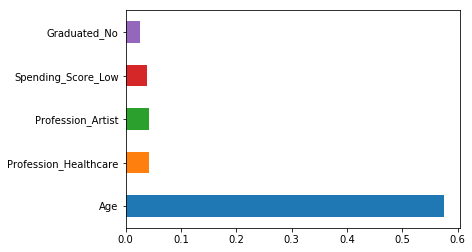

In [233]:
pd.Series(rfc_model.feature_importances_, index=x_train.columns).nlargest(5).plot(kind='barh')

#### DecisionTreeClassifier

In [234]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)
dtc_model.score(x_test, y_test)

0.46303180503923996

#### KNN

In [235]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_model.score(x_test, y_test)

0.4688145394465097

### submission

In [236]:
print(xxx)

NameError: name 'xxx' is not defined

In [ ]:
u = rfc_model.predict(test3)

In [ ]:
u = pd.DataFrame(u)
r = pd.concat([test.ID, u], axis=1)
r.head()

In [ ]:
r.to_csv('sub1.csv')

In [ ]:
pd.read_csv('sub1.csv').Segmentation.value_counts()